In [7]:
import os

PATH = "/Users/jwheo/Projects/bcsos/PPoS_Ext_Proof"

fdbs = [os.path.join(PATH, f) for f in os.listdir(PATH) if f.split(".")[-1] == 'csv']
if len(fdbs) == 0:
    subdirs = [x[0] for x in os.walk(PATH)]
    for subd in subdirs:
        subbs = [os.path.join(subd, f) for f in os.listdir(subd) if f.split(".")[-1] == 'csv']
        fdbs.extend(subbs)

fdbs.sort()
print(fdbs)

['/Users/jwheo/Projects/bcsos/PPoS_Ext_Proof/PPOS_EXT_64_btc_20231004_080506.csv', '/Users/jwheo/Projects/bcsos/PPoS_Ext_Proof/PPoS_Ext_32_btc_20230929_082143.csv', '/Users/jwheo/Projects/bcsos/PPoS_Ext_Proof/PPoS_Ext_32_eth_20230927_080831.csv', '/Users/jwheo/Projects/bcsos/PPoS_Ext_Proof/PPoS_Ext_64_eth_20230925_080822.csv']


In [8]:
import pandas as pd

dbs = {}
for i, f in enumerate(fdbs):
    key1 = f.split('_')[4]
    key2 = f.split('_')[5]
    print("========>", key1, key2)
    df = pd.read_csv(f)
    
    if key2.lower() == 'btc': 
        key2 = "Bitcoin"
    elif key2.lower() == 'eth': 
        key2 = "Ethereum"

    key = f'{key2}, GF(2^{key1})'
    dbs[key] = [key2, key1, df]

print(dbs.keys())



========> 64 btc
========> 32 btc
========> 32 eth
========> 64 eth
dict_keys(['Bitcoin, GF(2^64)', 'Bitcoin, GF(2^32)', 'Ethereum, GF(2^32)', 'Ethereum, GF(2^64)'])


<Figure size 1000x500 with 0 Axes>

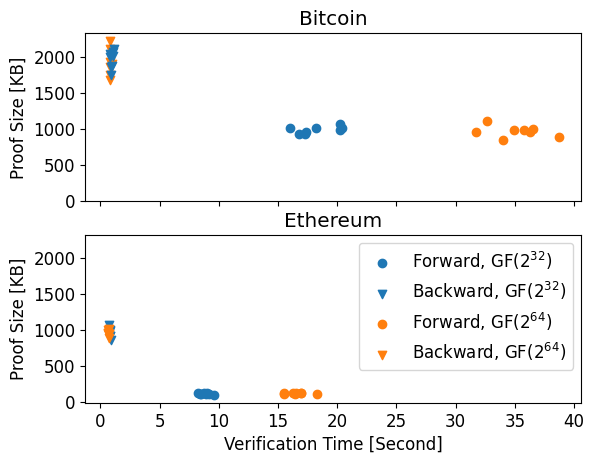

In [9]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,5))
f, axes = plt.subplots(nrows = 2, ncols = 1, sharex=True, sharey = True)

# colors = ['blue', 'orange', 'green', 'red']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['o', 'v', 'x', '_']

for i, key in enumerate(dbs):
    key2, key1, df = dbs[key]
    if key2 == 'Bitcoin':
        if key1 == '32':
            color = colors[0]            
        elif key1 == '64':
            color = colors[1]
        axes[0].scatter(df['Forward Verification Time']/1000, df['Forward Proof Size'], marker=markers[0], color=color, label=f'Forward, GF($2^{{{key1}}}$)')        
        axes[0].scatter(df['Backward Verification Time']/1000, df['Backward Proof Size'], marker=markers[1], color=color, label=f'Backward, GF($2^{{{key1}}}$)')        
        axes[0].set_ylabel('Proof Size [KB]')
        axes[0].title.set_text('Bitcoin')

for i, key in enumerate(dbs):
    key2, key1, df = dbs[key]
    if key2 == 'Ethereum':
        if key1 == '32':
            color = colors[0]
        elif key1 == '64':
            color = colors[1]            
        axes[1].scatter(df['Forward Verification Time']/1000, df['Forward Proof Size'], marker=markers[0], color=color, label=f'Forward, GF($2^{{{key1}}}$)')
        axes[1].scatter(df['Backward Verification Time']/1000, df['Backward Proof Size'], marker=markers[1], color=color, label=f'Backward, GF($2^{{{key1}}}$)')
        axes[1].set_ylabel('Proof Size [KB]')
        axes[1].set_xlabel('Verification Time [Second]')
        axes[1].title.set_text('Ethereum')
        axes[1].legend()


plt.savefig('CompareTimeSize.png', dpi=300, bbox_inches='tight')
# plt.show()
